# Analysis of results extracted with Boosting + Complexity Measures

In this notebook we are going to compare the results (error rate and exponential loss) obtained with the three different options we have tested:
* Classic AdaBoost: this implies that weights are initializated with 1/n
* Classic AdaBoost with initial weights modified by means of complexity measures. The idea is that, since boosting iteratively gives more weight to difficult instances, maybe some easy instances are a little bit "forgotten" and by starting by giving more weight to the easiest instances, a good performance is obtained faster. However, I think the correct option is to start by giving more weight to the hardest instances since the easiest ones do not need a lot of effort by the learners, so the learner will easily learn them, but they will have more troubles in correctly predicting the hardest ones, thus, the sooner the learners face the hard instances, the sooner the performence will be acceptable. We will try both options. The options are: init_easy and init_hard
* AdaBoost with initial weights modified with complexity measure and weights update modified with complexity measure. We know this option cannot work properly since the weight update in Boosting is performed through theoretical minimization of the exponential loss (in case of AdaBoost). Therefore, any modification regarding these values will be detrimental for the minimization of the objective function. We omit the analysis of this option since theoretically it makes no sense.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import glob

os.chdir("..")
root_path = os.getcwd()

In [2]:
path_csv = os.path.join(root_path, 'Results_Boosting')
os.chdir(path_csv)
df = pd.read_csv('AggregatedResults_Boosting_parkinsons.csv')

In [3]:
df.head()

,dataset,n_ensemble,method_weights,compl_measure,exp_loss_avg_train_mean,misc_rate_train_mean,misc_rate_test_mean,exp_loss_avg_train_std,misc_rate_train_std,misc_rate_test_std,conf_matrix_test_total
0,parkinsons,1,classic,none,0.677240,0.131620,0.158947,0.023041,0.009803,0.087325,"[[30, 18], [13, 134]]"
1,parkinsons,2,classic,none,0.677240,0.131620,0.158947,0.023041,0.009803,0.087325,"[[30, 18], [13, 134]]"
2,parkinsons,3,classic,none,0.658498,0.123646,0.179474,0.041415,0.017620,0.096314,"[[28, 20], [15, 132]]"
3,parkinsons,4,classic,none,0.670562,0.128779,0.168684,0.029842,0.012697,0.074012,"[[29, 19], [14, 133]]"
4,parkinsons,5,classic,none,0.655743,0.122474,0.163947,0.050545,0.021505,0.101186,"[[31, 17], [15, 132]]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dataset                  8400 non-null   object 
 1   n_ensemble               8400 non-null   int64  
 2   method_weights           8400 non-null   object 
 3   compl_measure            8400 non-null   object 
 4   exp_loss_avg_train_mean  8400 non-null   float64
 5   misc_rate_train_mean     8400 non-null   float64
 6   misc_rate_test_mean      8400 non-null   float64
 7   exp_loss_avg_train_std   8400 non-null   float64
 8   misc_rate_train_std      8400 non-null   float64
 9   misc_rate_test_std       8400 non-null   float64
 10  conf_matrix_test_total   8400 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 722.0+ KB


In [5]:
stats = df.groupby('method_weights').agg({
    'exp_loss_avg_train_mean': ['mean', 'std'],
    'misc_rate_train_mean': ['mean', 'std'],
    'misc_rate_test_mean': ['mean', 'std']
})

stats


exp_loss_avg_train_mean           misc_rate_train_mean  \
                                       mean       std                 mean   
method_weights                                                               
classic                            0.379289  0.048023             0.004854   
init_easy                          0.388979  0.057097             0.008977   
init_easy_w_complex                0.691459  0.035027             0.137670   
init_hard                          0.379308  0.047935             0.004862   

                              misc_rate_test_mean            
                          std                mean       std  
method_weights                                               
classic              0.020432            0.108598  0.012270  
init_easy            0.024293            0.102751  0.020413  
init_easy_w_complex  0.014902            0.173415  0.017791  
init_hard            0.020395            0.101493  0.015925

In [6]:
#colour_palette_personalized = ["#FFD700", "#00CED1", "#FF1493","#F1F1F1"]
colour_palette_personalized = {
    "classic": "#FFD700",   # yellow
    "init_easy": "#00CED1", # blue
    "init_hard": "#FF1493",    # magenta
    "init_easy_w_complex": "#F1F1F1"     # grey
}

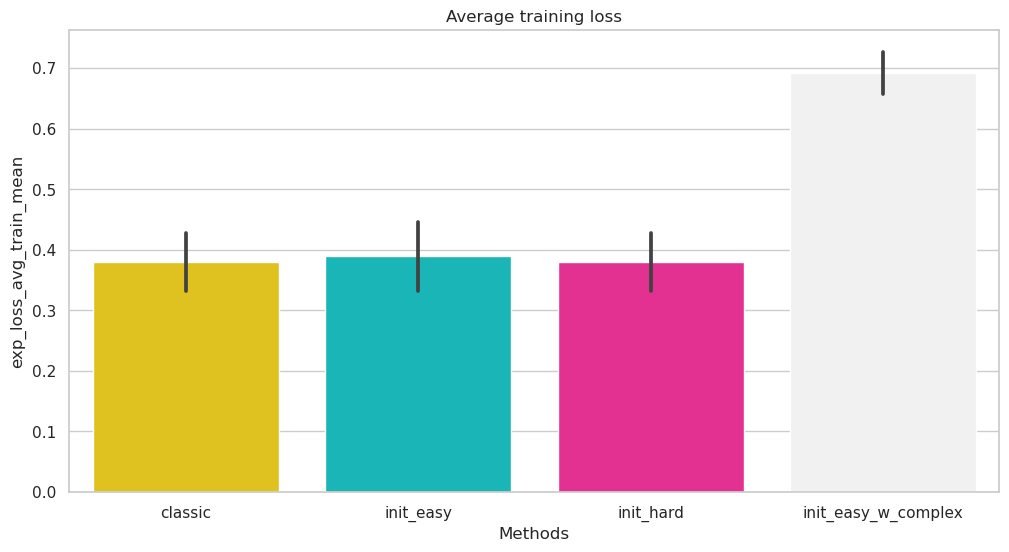

In [7]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Gráfico de barras para exp_loss_avg_train_mean
plt.figure(figsize=(12, 6))
sns.barplot(x='method_weights', y='exp_loss_avg_train_mean', data=df, errorbar="sd", palette=colour_palette_personalized)
plt.title('Average training loss')
plt.ylabel('exp_loss_avg_train_mean')
plt.xlabel('Methods')
plt.show()



In [8]:
df.shape

(8400, 11)

We remove all results concerning init_easy_w_complex

In [9]:
df = df[df.method_weights != 'init_easy_w_complex']
df.reset_index()
df.shape

(5700, 11)

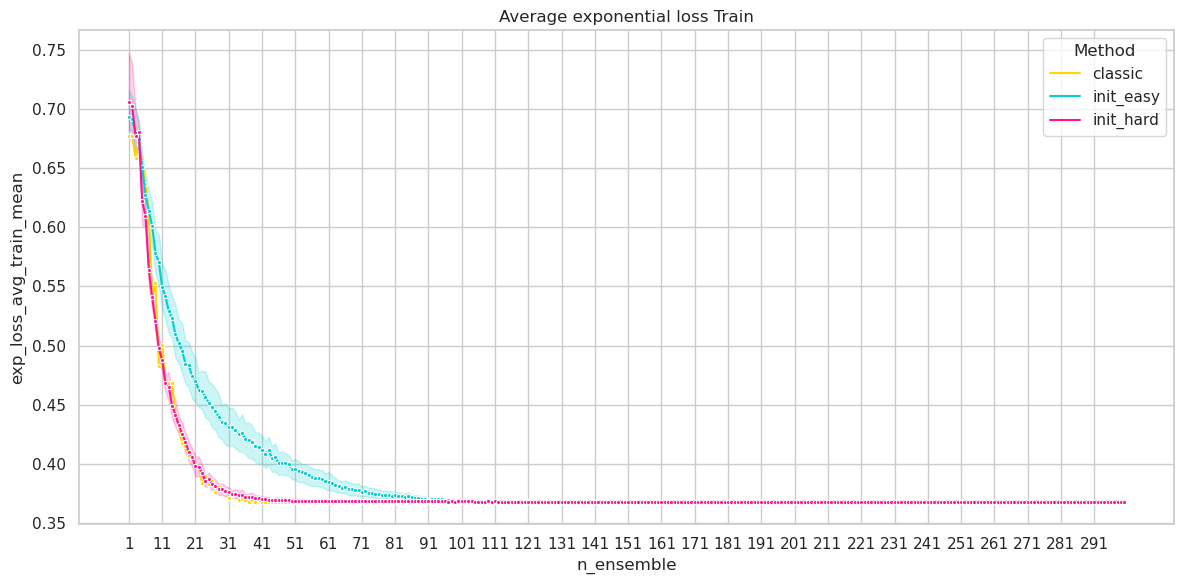

In [10]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='n_ensemble', y='exp_loss_avg_train_mean', hue='method_weights', marker='.', palette=colour_palette_personalized)

plt.title('Average exponential loss Train')
plt.xlabel('n_ensemble')
plt.ylabel('exp_loss_avg_train_mean')
plt.legend(title='Method')
plt.xticks(ticks=range(1, 301, 10)) 
plt.grid(True)
plt.tight_layout()
plt.show()

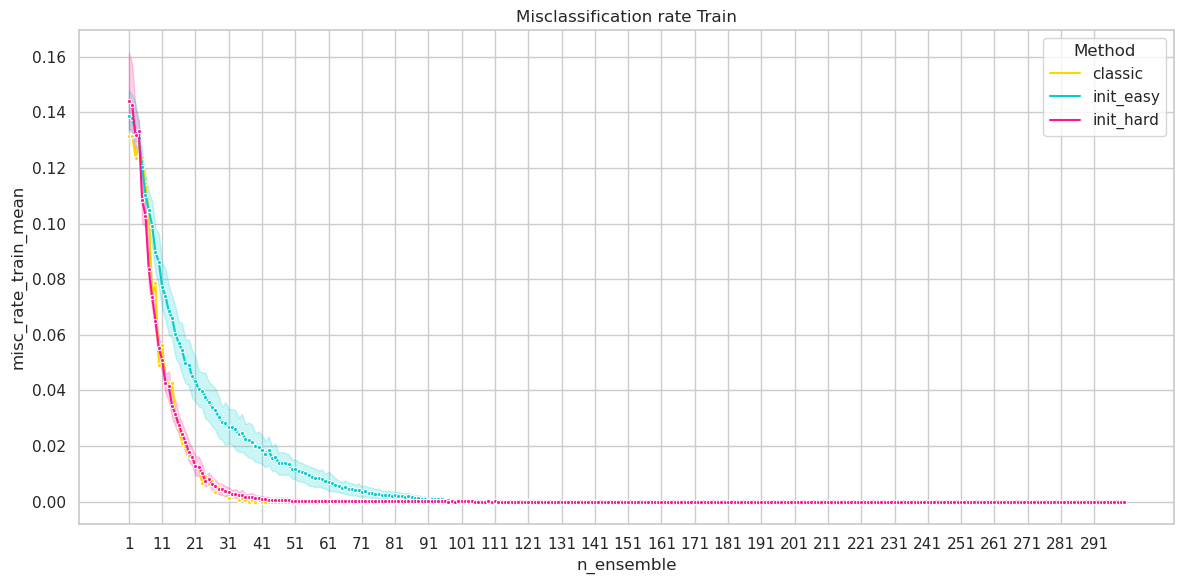

In [11]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='n_ensemble', y='misc_rate_train_mean', hue='method_weights', marker='.', palette=colour_palette_personalized)

plt.title('Misclassification rate Train')
plt.xlabel('n_ensemble')
plt.ylabel('misc_rate_train_mean')
plt.legend(title='Method')
plt.xticks(ticks=range(1, 301, 10)) 
plt.grid(True)
plt.tight_layout()
plt.show()

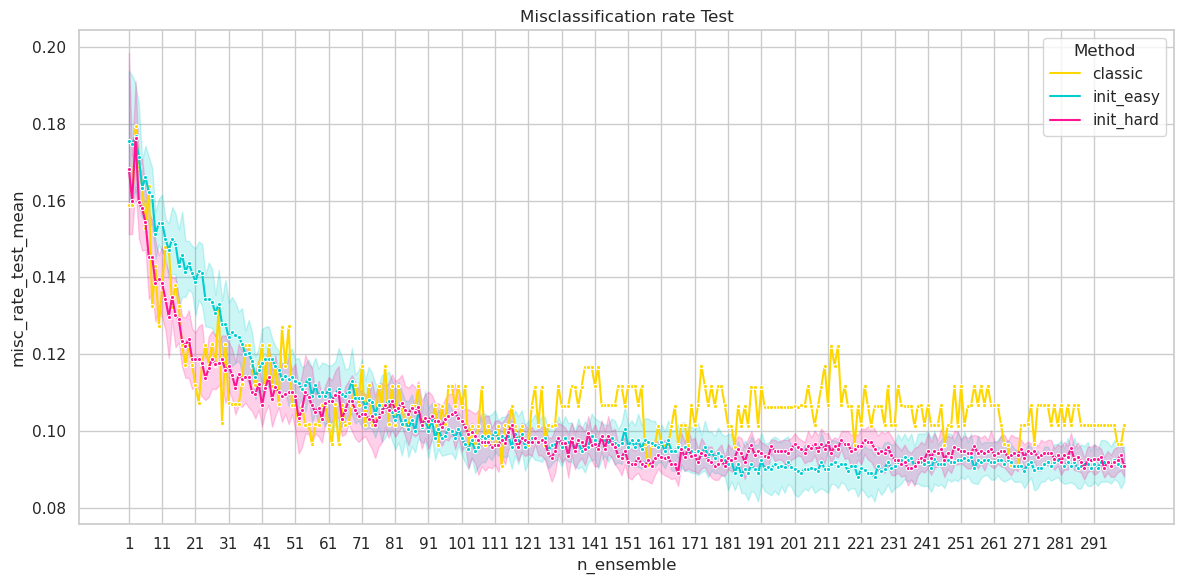

In [12]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='n_ensemble', y='misc_rate_test_mean', hue='method_weights', marker='.', palette=colour_palette_personalized)

plt.title('Misclassification rate Test')
plt.xlabel('n_ensemble')
plt.ylabel('misc_rate_test_mean')
plt.legend(title='Method')
plt.xticks(ticks=range(1, 301, 10)) 
plt.grid(True)
plt.tight_layout()
plt.show()

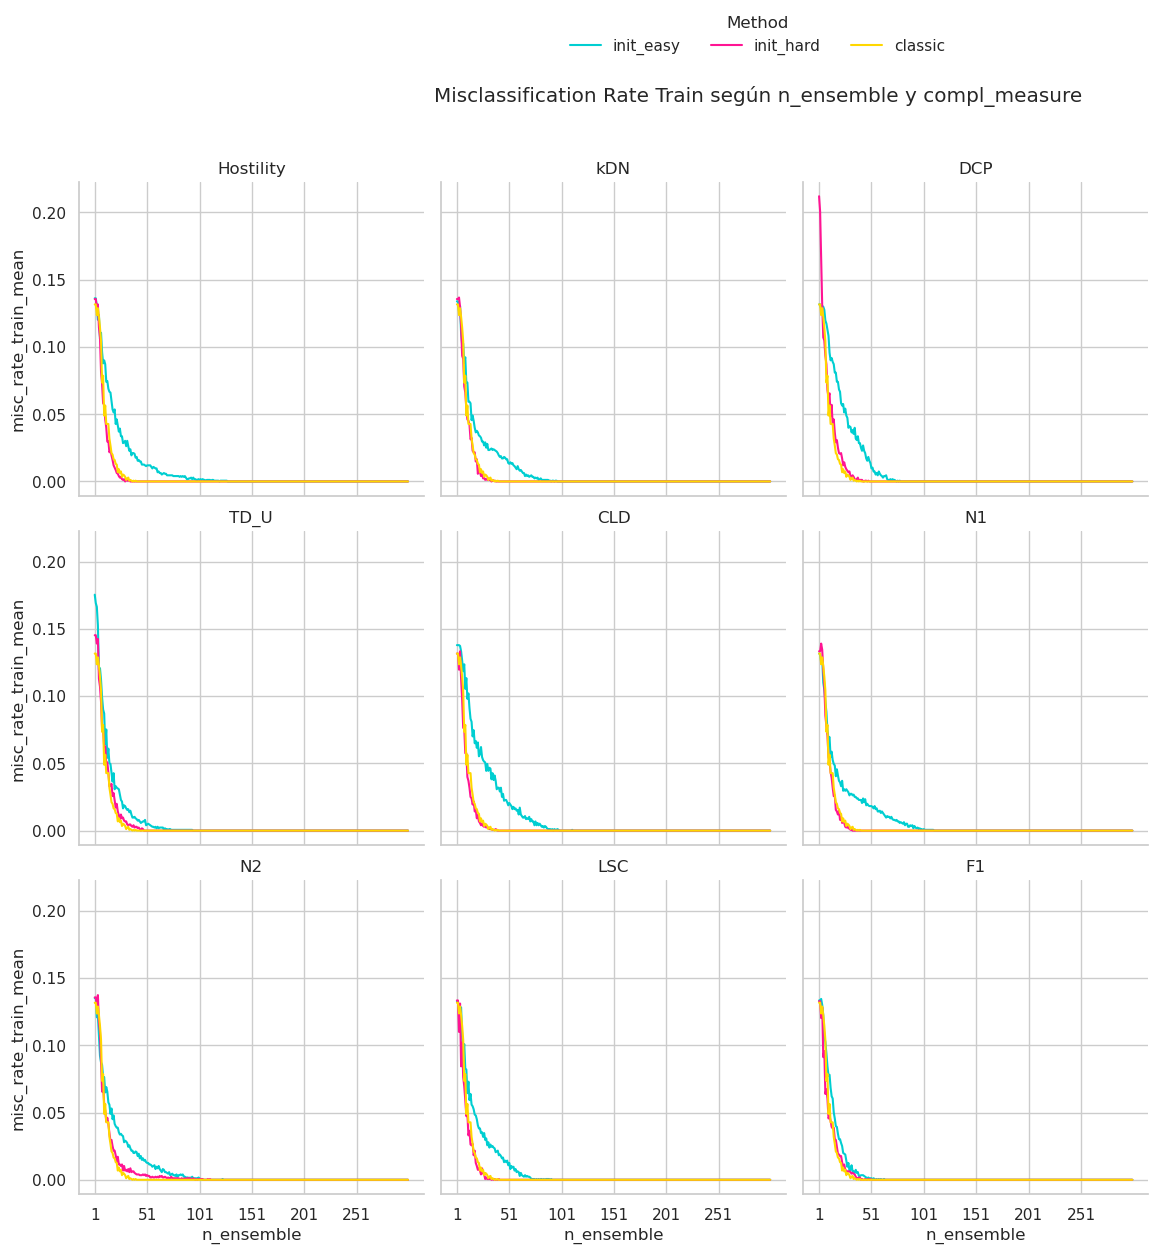

In [13]:
# Crear un nuevo DataFrame que asegure la presencia de 'classic' en cada valor de compl_measure
df_complete = []

for compl in df[df['method_weights'] != "classic"]['compl_measure'].unique():
    # Filtrar los datos para cada compl_measure distinto de "none"
    df_subset = df[df['compl_measure'] == compl]
    
    # Añadir los datos tal cual para los métodos init_easy e init_w
    df_complete.append(df_subset)
    
    # Añadir la línea para 'classic' en el mismo compl_measure
    classic_data = df[(df['method_weights'] == "classic") & (df['compl_measure'] == "none")].copy()
    classic_data['compl_measure'] = compl  # Asignar el compl_measure actual
    df_complete.append(classic_data)

# Concatenar los datos completos en un único DataFrame
df_complete = pd.concat(df_complete)

# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'misc_rate_train_mean')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "misc_rate_train_mean")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Misclassification Rate Train según n_ensemble y compl_measure')  # Título general
plt.show()


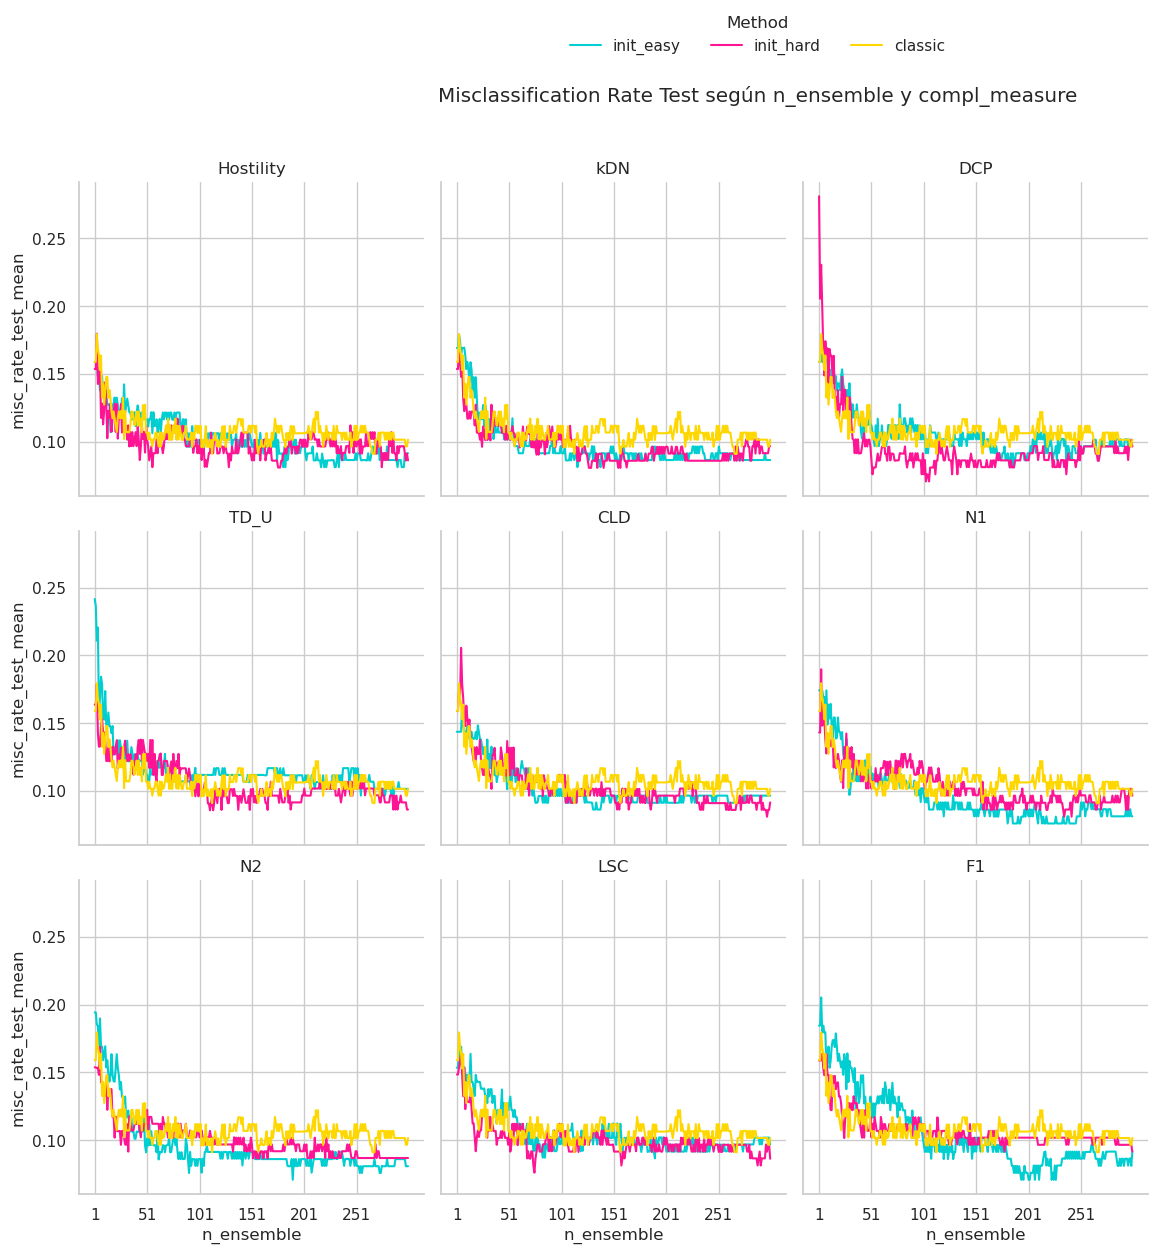

In [14]:
# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'misc_rate_test_mean')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "misc_rate_test_mean")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Misclassification Rate Test según n_ensemble y compl_measure')  # Título general
plt.show()


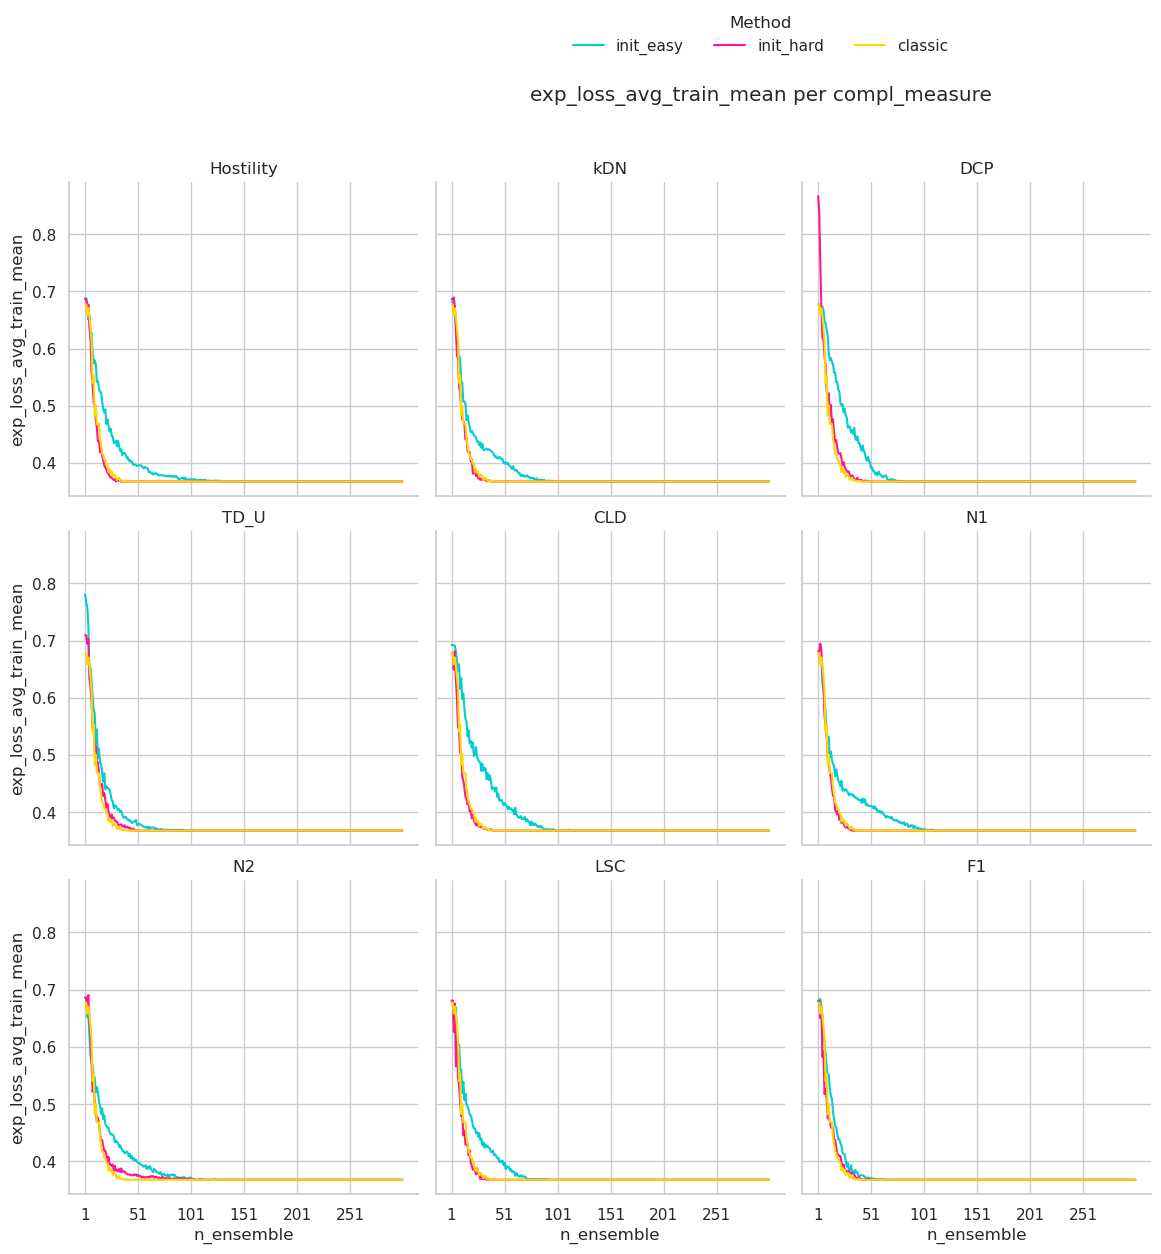

In [15]:
# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'exp_loss_avg_train_mean')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "exp_loss_avg_train_mean")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('exp_loss_avg_train_mean per compl_measure')  # Título general
plt.show()

# Analysis aggregating results for all datasets

We perform this analysis for all the datasets now. We read all the csv and we aggregate the results to obtain a general overview.

In [16]:
specific_path = os.path.join(path_csv, '*Aggregated*.csv')
selected_files = glob.glob(specific_path)
all_datasets = pd.concat([pd.read_csv(f) for f in selected_files], ignore_index=True)

In [26]:
all_datasets.shape

(369600, 11)

In [27]:
all_datasets = all_datasets[all_datasets.method_weights != 'init_easy_w_complex']
all_datasets.reset_index()
all_datasets.shape

(250800, 11)

We aggregate all the results by calculating mean, median and standard deviation of exp_loss, misc_rate_train and misc_rate_test

In [28]:
all_adaboost = all_datasets.groupby(['n_ensemble', 'method_weights', 'compl_measure']).agg(
    exp_loss_avg_train_mean=('exp_loss_avg_train_mean', 'mean'),
    exp_loss_avg_train_median=('exp_loss_avg_train_mean', 'median'),
    exp_loss_avg_train_std=('exp_loss_avg_train_mean', 'std'),
    misc_rate_train_mean_mean=('misc_rate_train_mean', 'mean'),
    misc_rate_train_mean_median=('misc_rate_train_mean', 'median'),
    misc_rate_train_mean_std=('misc_rate_train_mean', 'std'),
    misc_rate_test_mean_mean=('misc_rate_test_mean', 'mean'),
    misc_rate_test_mean_median=('misc_rate_test_mean', 'median'),
    misc_rate_test_mean_std=('misc_rate_test_mean', 'std')
).reset_index()

In [29]:
all_adaboost.head()

,n_ensemble,method_weights,compl_measure,exp_loss_avg_train_mean,exp_loss_avg_train_median,exp_loss_avg_train_std,misc_rate_train_mean_mean,misc_rate_train_mean_median,misc_rate_train_mean_std,misc_rate_test_mean_mean,misc_rate_test_mean_median,misc_rate_test_mean_std
0,1,classic,none,0.988217,1.006722,0.272742,0.263928,0.271802,0.116040,0.279094,0.286433,0.120019
1,1,init_easy,CLD,0.996892,1.031493,0.280709,0.267619,0.282340,0.119430,0.282778,0.306438,0.125968
2,1,init_easy,DCP,0.997338,1.038669,0.269151,0.267809,0.285394,0.114513,0.284127,0.303571,0.119134
3,1,init_easy,F1,1.012315,1.044956,0.289271,0.274181,0.288068,0.123073,0.290265,0.309994,0.125700
4,1,init_easy,Hostility,0.983297,1.024786,0.265333,0.261835,0.279487,0.112889,0.280395,0.295013,0.119968


In [30]:
#all_adaboost.to_csv('All_results_AdaBoost_Averaged_per_Dataset.csv', index=False)

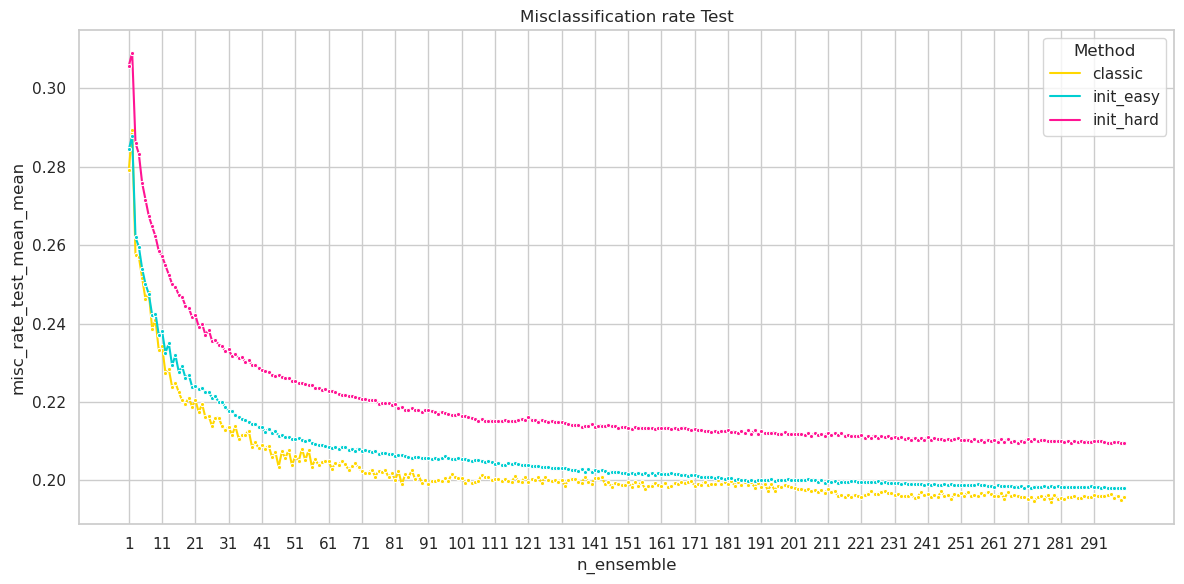

In [37]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=all_adaboost, x='n_ensemble', y='misc_rate_test_mean_mean', hue='method_weights', errorbar=(None), marker='.',
             palette=colour_palette_personalized) # errorbar=('ci', 95)

plt.title('Misclassification rate Test')
plt.xlabel('n_ensemble')
plt.ylabel('misc_rate_test_mean_mean')
plt.legend(title='Method')
plt.xticks(ticks=range(1, 301, 10)) 
plt.grid(True)
plt.tight_layout()
plt.show()

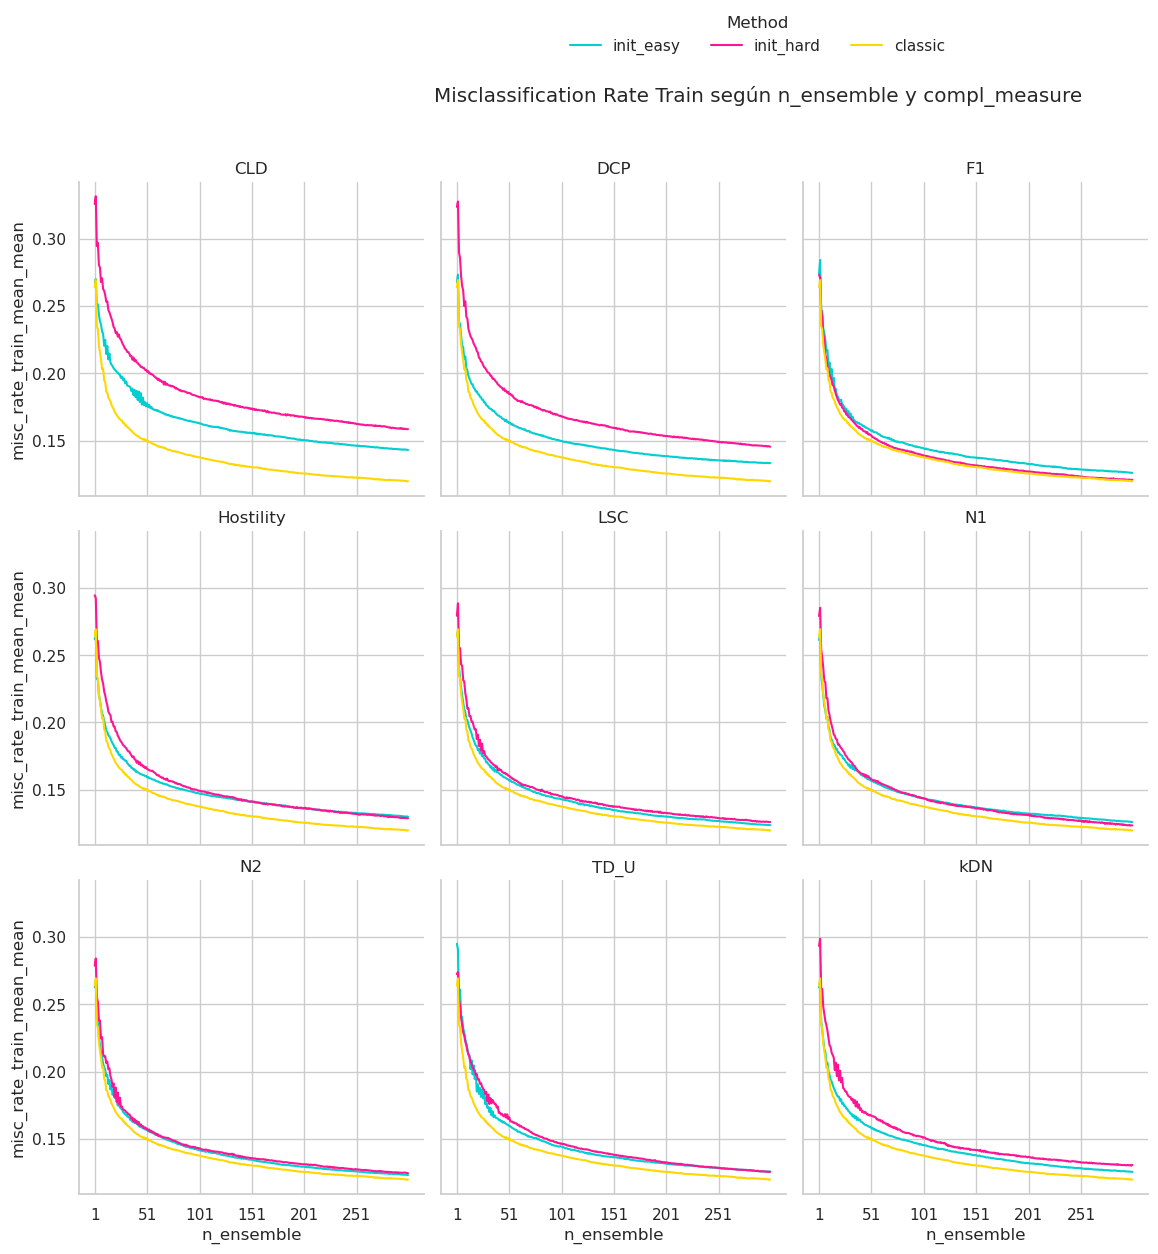

In [38]:
# Crear un nuevo DataFrame que asegure la presencia de 'classic' en cada valor de compl_measure
df_complete_all = []

for compl in all_adaboost[all_adaboost['method_weights'] != "classic"]['compl_measure'].unique():
    # Filtrar los datos para cada compl_measure distinto de "none"
    df_subset = all_adaboost[all_adaboost['compl_measure'] == compl]
    
    # Añadir los datos tal cual para los métodos init_easy e init_w
    df_complete_all.append(df_subset)
    
    # Añadir la línea para 'classic' en el mismo compl_measure
    classic_data = all_adaboost[(all_adaboost['method_weights'] == "classic") & (all_adaboost['compl_measure'] == "none")].copy()
    classic_data['compl_measure'] = compl  # Asignar el compl_measure actual
    df_complete_all.append(classic_data)

# Concatenar los datos completos en un único DataFrame
df_complete_all = pd.concat(df_complete_all)

# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete_all, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'misc_rate_train_mean_mean')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "misc_rate_train_mean_mean")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Misclassification Rate Train MEAN MEAN')  # Título general
plt.show()

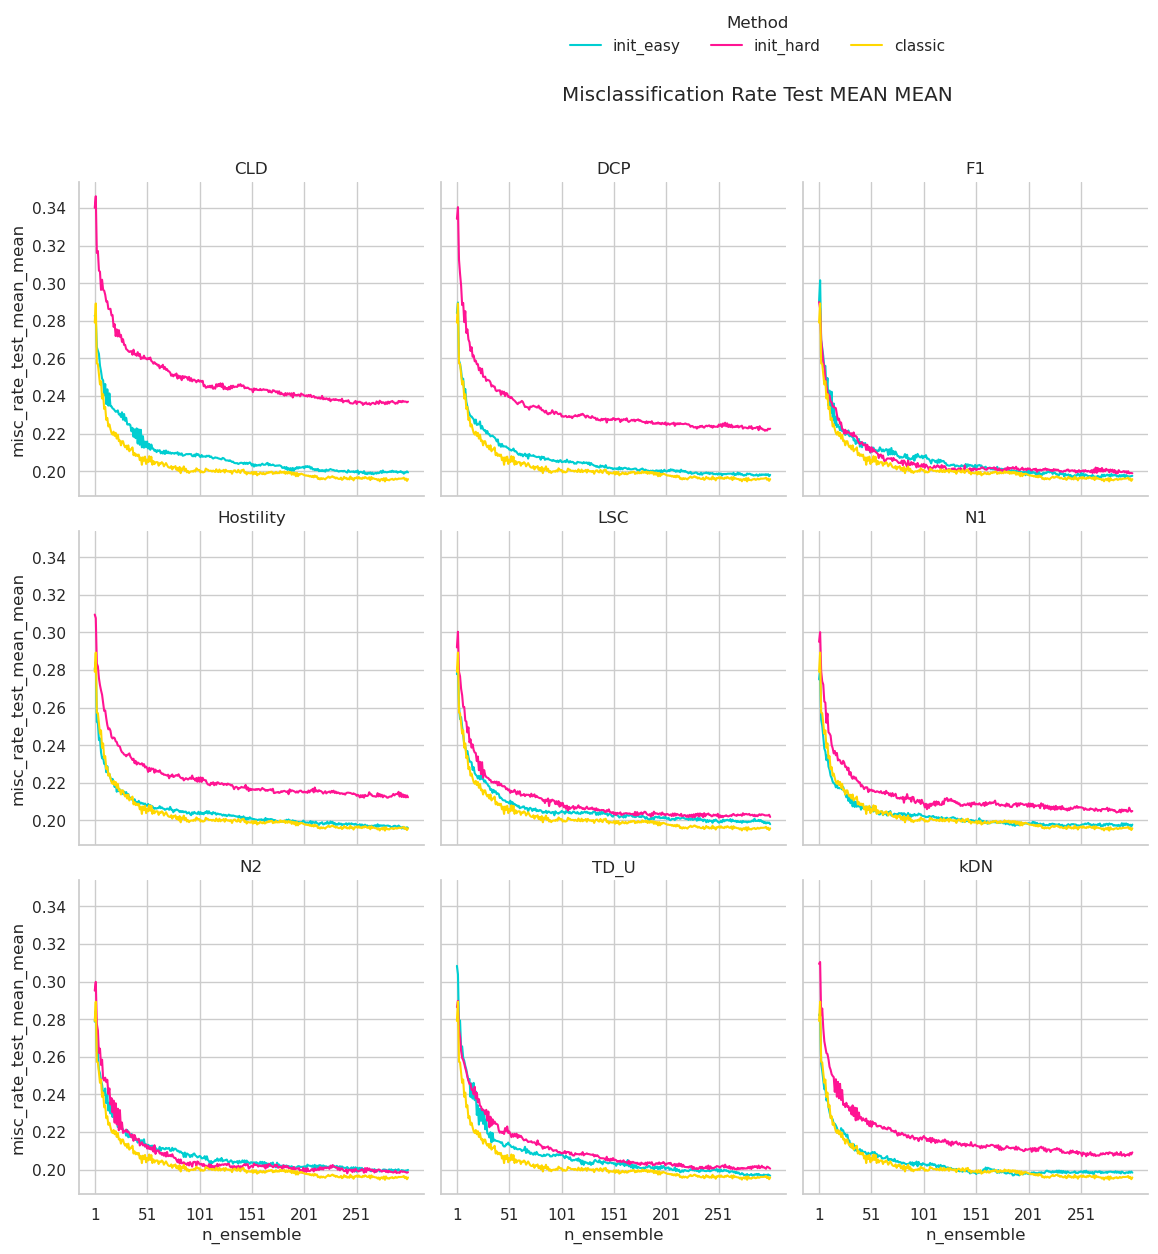

In [44]:
# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete_all, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'misc_rate_test_mean_mean')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "misc_rate_test_mean_mean")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Misclassification Rate Test MEAN MEAN') 
plt.show()

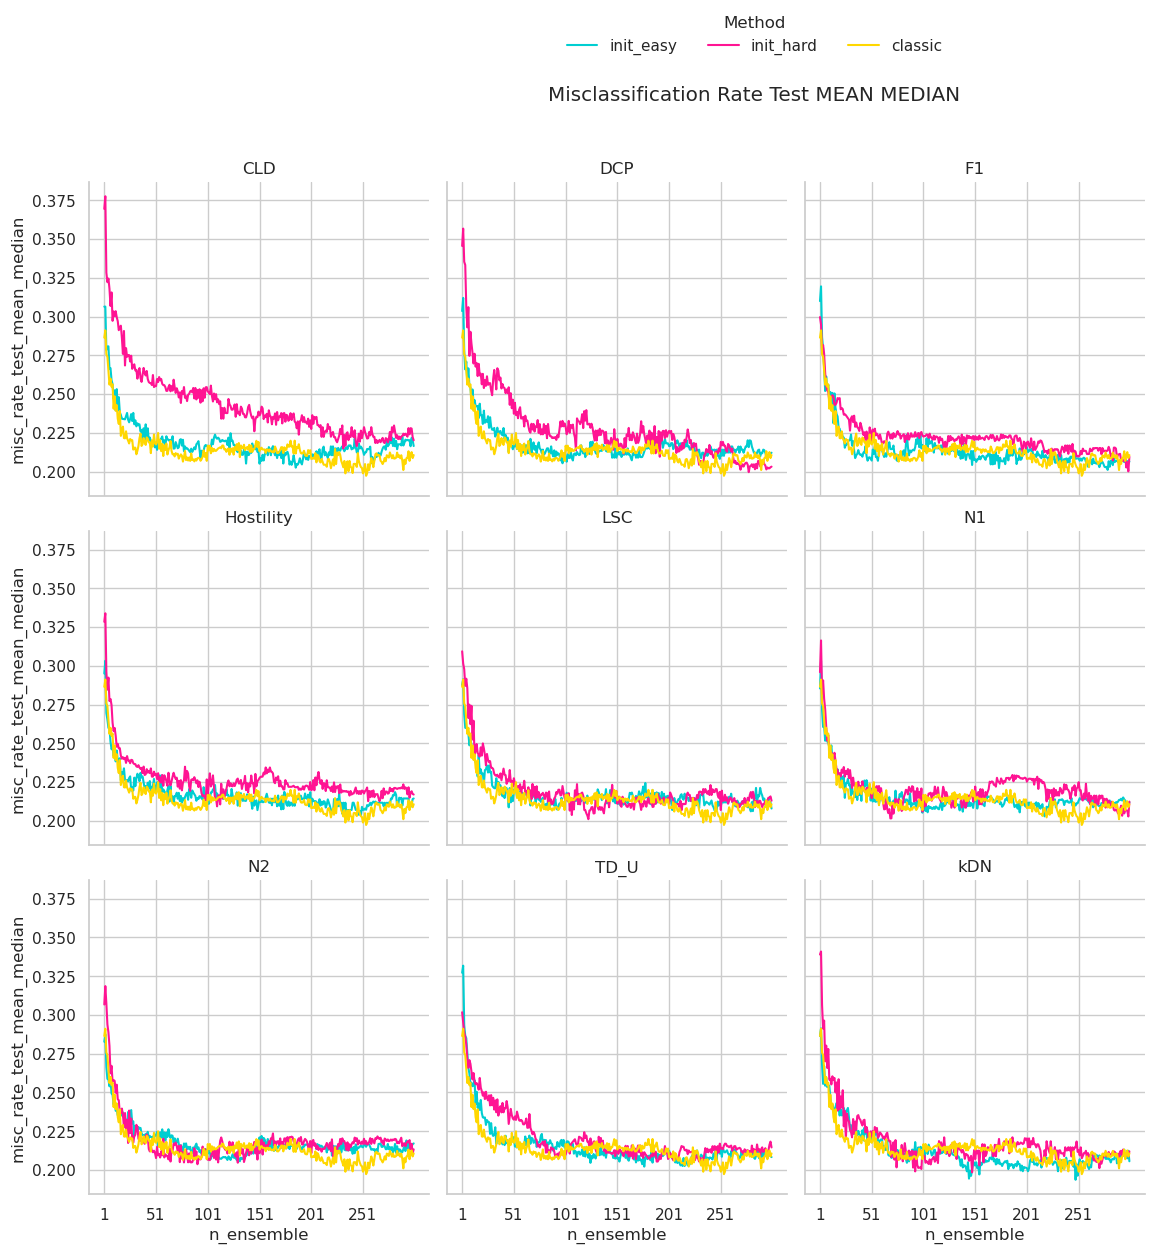

In [45]:
# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete_all, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'misc_rate_test_mean_median')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "misc_rate_test_mean_median")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Misclassification Rate Test MEAN MEDIAN') 
plt.show()

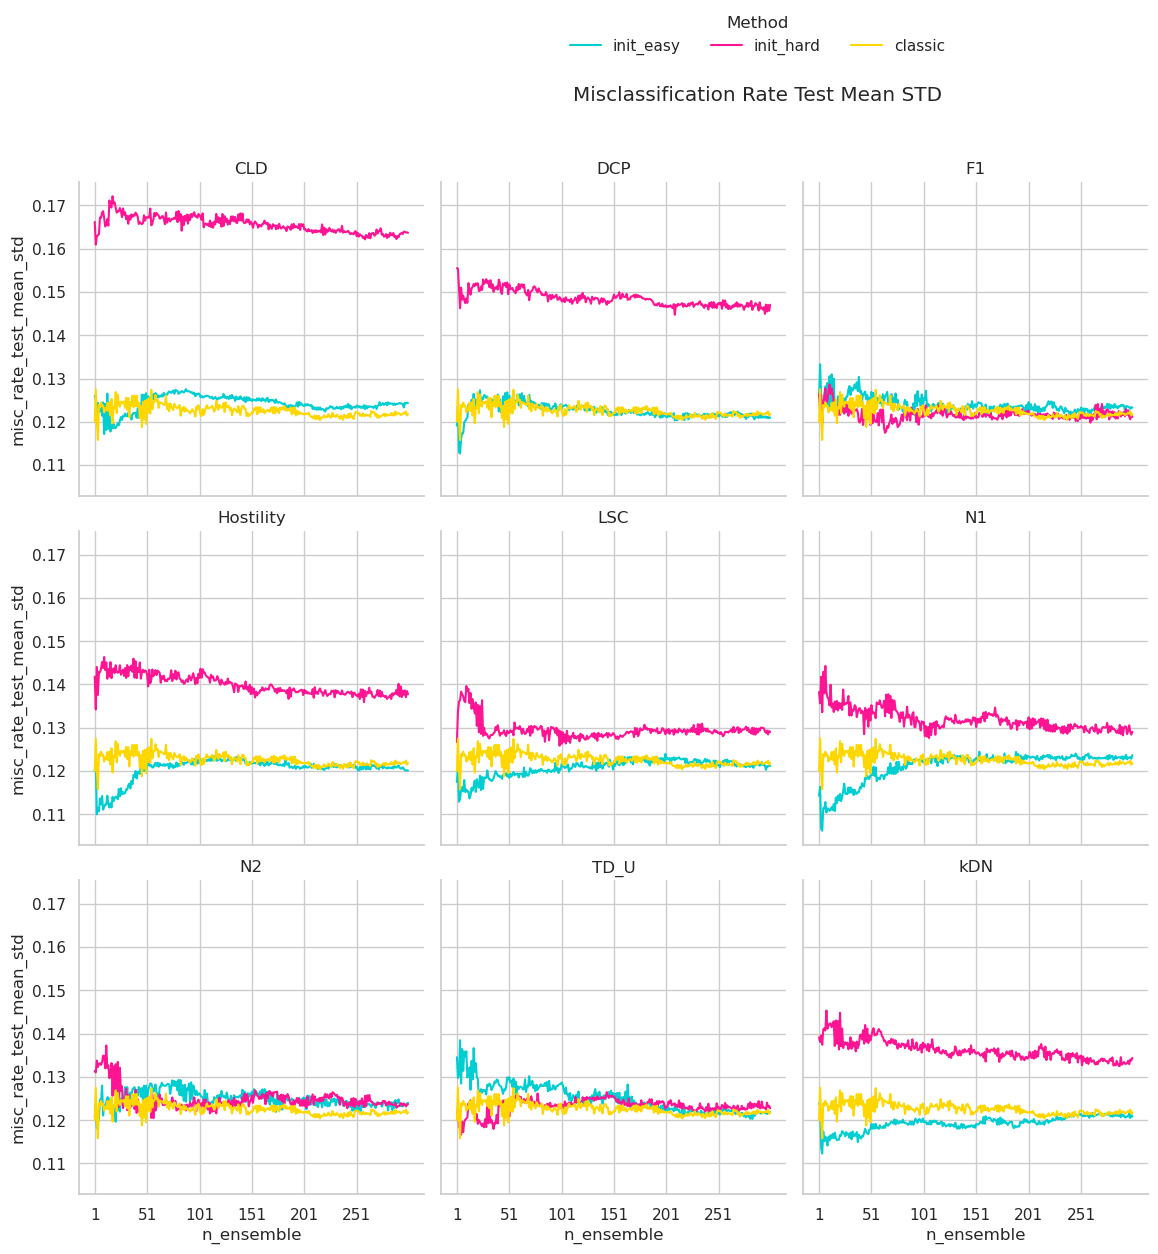

In [46]:
# Crear la cuadrícula de gráficos con Seaborn
g = sns.FacetGrid(df_complete_all, col="compl_measure", hue="method_weights", col_wrap=3, height=4, palette=colour_palette_personalized)

# Graficar las líneas de tasa de error de clasificación en el conjunto de entrenamiento
g.map(sns.lineplot, 'n_ensemble', 'misc_rate_test_mean_std')

# Configurar títulos y leyendas
g.set_titles("{col_name}")
g.set_axis_labels("n_ensemble", "misc_rate_test_mean_std")
g.add_legend(title="Method", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

# Ajustar etiquetas del eje x para que muestren cada 10 valores
for ax in g.axes.flat:
    ax.set_xticks(range(1, 301, 50))
    ax.grid(True)

# Ajustar el título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Misclassification Rate Test Mean STD')  # Título general
plt.show()

In [41]:
all_datasets

,dataset,n_ensemble,method_weights,compl_measure,exp_loss_avg_train_mean,misc_rate_train_mean,misc_rate_test_mean,exp_loss_avg_train_std,misc_rate_train_std,misc_rate_test_std,conf_matrix_test_total
0,ring,1,classic,none,1.277231,0.386892,0.386892,0.002867,0.001220,0.010979,"[[915, 2749], [114, 3622]]"
1,ring,2,classic,none,1.277231,0.386892,0.386892,0.002867,0.001220,0.010979,"[[915, 2749], [114, 3622]]"
2,ring,3,classic,none,1.093469,0.308709,0.314189,0.006300,0.002680,0.013305,"[[1614, 2050], [275, 3461]]"
3,ring,4,classic,none,1.093469,0.308709,0.314189,0.006300,0.002680,0.013305,"[[1614, 2050], [275, 3461]]"
4,ring,5,classic,none,0.972490,0.257237,0.264324,0.002533,0.001078,0.014459,"[[2101, 1563], [393, 3343]]"
...,...,...,...,...,...,...,...,...,...,...,...
366895,diabetic_retinopathy,296,init_hard,F1,0.915378,0.232938,0.315352,0.027944,0.011889,0.039918,"[[353, 187], [176, 435]]"
366896,diabetic_retinopathy,297,init_hard,F1,0.915151,0.232842,0.309265,0.028436,0.012098,0.046690,"[[356, 184], [172, 439]]"
366897,diabetic_retinopathy,298,init_hard,F1,0.910840,0.231008,0.316222,0.028721,0.012219,0.040789,"[[349, 191], [173, 438]]"
366898,diabetic_retinopathy,299,init_hard,F1,0.912202,0.231587,0.314483,0.026698,0.011359,0.041510,"[[352, 188], [174, 437]]"


In [42]:
# Encontrar el menor valor de misc_rate_test_mean para cada métod
resultados = []

# Agrupar por dataset y method_weights
for dataset in all_datasets['dataset'].unique():
    subset_dataset = all_datasets[all_datasets['dataset'] == dataset]
    
    for method in subset_dataset['method_weights'].unique():
        subset_method = subset_dataset[subset_dataset['method_weights'] == method]
        min_misc_rate = subset_method['misc_rate_test_mean'].min()
        
        # Obtener el n_ensemble correspondiente
        n_ensemble_at_min = subset_method.loc[subset_method['misc_rate_test_mean'] == min_misc_rate, 'n_ensemble'].values[0]
        
        resultados.append({
            'dataset': dataset,
            'method_weights': method,
            'min_misc_rate_test_mean': min_misc_rate,
            'n_ensemble': n_ensemble_at_min
        })

# Convertir a DataFrame para una mejor visualización
resultados_df = pd.DataFrame(resultados)

# Mostrar los resultados
resultados_df

,dataset,method_weights,min_misc_rate_test_mean,n_ensemble
0,ring,classic,0.039730,300
1,ring,init_easy,0.039189,297
2,ring,init_hard,0.035405,298
3,vertebral_column,classic,0.145161,57
4,vertebral_column,init_easy,0.138710,26
...,...,...,...,...
127,banknote_authentication,init_easy,0.001455,236
128,banknote_authentication,init_hard,0.001455,80
129,diabetic_retinopathy,classic,0.309325,177
130,diabetic_retinopathy,init_easy,0.297189,219


Aquí tengo que estudiar con detalle quién consigue el mínimo y de qué manera porque en algunos casos nosotros lo conseguimos mucho antes y eso es muy interesante. Por otro lado, voy a hacer los gráficos estos pero diferenciando por complejidad del dataset. 
También hacemos tabla poniendo cuándo consigue lo mejor cada uno para cada dataset, en qué momento y añadir mediana y std
Para hacer una comparativa para distintos valores de n_ensemble, hacemos tipo WTL, como hicimos en Bagging
Más adelante ya platearemos test de significatividad


In [47]:


# Supongamos que ya tienes el DataFrame `resultados_df` con las columnas:
# 'dataset', 'method_weights', 'min_misc_rate_test_mean', 'n_ensemble', 'misc_rate_test_mean_median', 'misc_rate_test_mean_std'

# Primero, asegurémonos de que los valores de mediana y std están en el DataFrame
# Agregar valores de mediana y desviación estándar para cada combinación de dataset y métod
all_datasets['misc_rate_test_mean_median'] = all_datasets.groupby(['dataset', 'method_weights'])['misc_rate_test_mean'].transform('median')
all_datasets['misc_rate_test_mean_std'] = all_datasets.groupby(['dataset', 'method_weights'])['misc_rate_test_mean'].transform('std')

# Filtramos los mínimos valores por métod y dataset
resultados = []
for dataset in all_datasets['dataset'].unique():
    subset_dataset = all_datasets[all_datasets['dataset'] == dataset]
    dataset_info = {'Dataset': dataset}
    
    for method in ['classic', 'init_easy', 'init_hard']:
        subset_method = subset_dataset[subset_dataset['method_weights'] == method]
        
        if not subset_method.empty:
            min_misc_rate = subset_method['misc_rate_test_mean'].min()
            n_ensemble_at_min = subset_method.loc[subset_method['misc_rate_test_mean'] == min_misc_rate, 'n_ensemble'].values[0]
            median_misc_rate = subset_method['misc_rate_test_mean_median'].iloc[0]
            std_misc_rate = subset_method['misc_rate_test_mean_std'].iloc[0]
            
            # Agregar la información en un formato anidado
            dataset_info[method] = {
                'min_misc_rate_test_mean': min_misc_rate,
                'n_ensemble': n_ensemble_at_min,
                'median': median_misc_rate,
                'std': std_misc_rate
            }
        else:
            dataset_info[method] = {
                'min_misc_rate_test_mean': None,
                'n_ensemble': None,
                'median': None,
                'std': None
            }
    
    resultados.append(dataset_info)

# Convertir a DataFrame de pandas con las columnas anidadas
tabla_final = pd.json_normalize(resultados, sep='_')




/tmp/ipykernel_42159/885382212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_datasets['misc_rate_test_mean_median'] = all_datasets.groupby(['dataset', 'method_weights'])['misc_rate_test_mean'].transform('median')
/tmp/ipykernel_42159/885382212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_datasets['misc_rate_test_mean_std'] = all_datasets.groupby(['dataset', 'method_weights'])['misc_rate_test_mean'].transform('std')


                                Dataset  classic_min_misc_rate_test_mean  \
0                                  ring                         0.039730   
1                      vertebral_column                         0.145161   
2                 teaching_assistant_MH                         0.270000   
3                               saheart                         0.270490   
4                               bodyfat                         0.004000   
5                    steel-plates-fault                         0.000000   
6                               titanic                         0.209313   
7                       liver-disorders                         0.260000   
8                                 sonar                         0.120476   
9                              credit-g                         0.232000   
10                                musk1                         0.092420   
11                                 bupa                         0.249160   
12          

In [48]:
tabla_final

,Dataset,classic_min_misc_rate_test_mean,classic_n_ensemble,classic_median,classic_std,init_easy_min_misc_rate_test_mean,init_easy_n_ensemble,init_easy_median,init_easy_std,init_hard_min_misc_rate_test_mean,init_hard_n_ensemble,init_hard_median,init_hard_std
0,ring,0.039730,300,0.051892,0.054670,0.039189,297,0.074730,0.078929,0.035405,298,0.065338,0.091163
1,vertebral_column,0.145161,57,0.164516,0.013953,0.138710,26,0.174194,0.011940,0.141935,65,0.164516,0.015272
2,teaching_assistant_MH,0.270000,244,0.330000,0.055355,0.230909,285,0.350909,0.045524,0.252727,268,0.349091,0.057791
3,saheart,0.270490,9,0.302914,0.009927,0.263876,13,0.300879,0.011865,0.285523,4,0.326920,0.021660
4,bodyfat,0.004000,1,0.004000,0.000000,0.004000,1,0.004000,0.000000,0.004000,1,0.004000,0.000000
5,steel-plates-fault,0.000000,83,0.000000,0.058419,0.000000,93,0.000000,0.073378,0.000000,148,0.000000,0.064456
6,titanic,0.209313,18,0.216201,0.002548,0.200893,32,0.211615,0.006281,0.208538,120,0.226136,0.035566
7,liver-disorders,0.260000,91,0.280476,0.010578,0.239048,8,0.280476,0.018449,0.233333,14,0.315714,0.024796
8,sonar,0.120476,71,0.148810,0.024659,0.110952,207,0.154286,0.029703,0.100714,183,0.139524,0.033686
9,credit-g,0.232000,72,0.246000,0.010809,0.226000,195,0.243000,0.010757,0.244000,146,0.267000,0.021969


In [55]:
(all_datasets.columns)

Index(['dataset', 'n_ensemble', 'method_weights', 'compl_measure',
       'exp_loss_avg_train_mean', 'misc_rate_train_mean',
       'misc_rate_test_mean', 'exp_loss_avg_train_std', 'misc_rate_train_std',
       'misc_rate_test_std', 'conf_matrix_test_total',
       'misc_rate_test_mean_median', 'misc_rate_test_mean_std'],
      dtype='object')

In [56]:
# Paso 1: Tabla de mínimos
min_results = []
datasets = all_datasets['dataset'].unique()

for dataset in datasets:
    dataset_info = {'Dataset': dataset}
    # Obtener el mínimo para cada métod
    for method in ['classic', 'init_easy', 'init_hard']:
        subset_method = all_datasets[(all_datasets['dataset'] == dataset) & 
                                     (all_datasets['method_weights'] == method)]
        
        if not subset_method.empty:
            min_misc_rate = subset_method['misc_rate_test_mean'].min()
            n_ensemble_at_min = subset_method.loc[subset_method['misc_rate_test_mean'] == min_misc_rate, 'n_ensemble'].values[0]
            
            # Verificar el umbral para init_easy e init_hard en relación con el mínimo de classic
            if method == 'classic':
                min_classic_misc_rate = min_misc_rate
            else:
                threshold_n_ensemble = subset_method.loc[
                    subset_method['misc_rate_test_mean'] <= min_classic_misc_rate, 'n_ensemble'
                ].min() if not subset_method.loc[subset_method['misc_rate_test_mean'] <= min_classic_misc_rate].empty else None
            
                dataset_info[f'{method}_n_ensemble_below_classic_min'] = threshold_n_ensemble

            dataset_info.update({
                f'{method}_min_misc_rate_test_mean': min_misc_rate,
                f'{method}_n_ensemble_min': n_ensemble_at_min
            })
    
    min_results.append(dataset_info)

# Convertir a DataFrame
min_results_df = pd.DataFrame(min_results)




In [57]:
min_results_df

,Dataset,classic_min_misc_rate_test_mean,classic_n_ensemble_min,init_easy_n_ensemble_below_classic_min,init_easy_min_misc_rate_test_mean,init_easy_n_ensemble_min,init_hard_n_ensemble_below_classic_min,init_hard_min_misc_rate_test_mean,init_hard_n_ensemble_min
0,ring,0.039730,300,294.0,0.039189,297,247.0,0.035405,298
1,vertebral_column,0.145161,57,16.0,0.138710,26,12.0,0.141935,65
2,teaching_assistant_MH,0.270000,244,192.0,0.230909,285,233.0,0.252727,268
3,saheart,0.270490,9,13.0,0.263876,13,NaN,0.285523,4
4,bodyfat,0.004000,1,1.0,0.004000,1,1.0,0.004000,1
5,steel-plates-fault,0.000000,83,46.0,0.000000,93,45.0,0.000000,148
6,titanic,0.209313,18,4.0,0.200893,32,116.0,0.208538,120
7,liver-disorders,0.260000,91,3.0,0.239048,8,3.0,0.233333,14
8,sonar,0.120476,71,188.0,0.110952,207,105.0,0.100714,183
9,credit-g,0.232000,72,36.0,0.226000,195,NaN,0.244000,146


In [58]:
# Paso 2: Tabla de mediana, std y media total
summary_results = all_datasets.groupby(['dataset', 'method_weights']).agg(
    misc_rate_test_mean_median=('misc_rate_test_mean', 'median'),
    misc_rate_test_mean_std=('misc_rate_test_mean', 'std'),
    misc_rate_test_mean_total_mean=('misc_rate_test_mean', 'mean')
).reset_index()

# Pivotar para obtener una tabla más organizada
summary_pivot = summary_results.pivot(index='dataset', columns='method_weights', 
                                      values=['misc_rate_test_mean_median', 'misc_rate_test_mean_std', 'misc_rate_test_mean_total_mean'])

# Renombrar columnas para que sean más fáciles de leer
summary_pivot.columns = [f'{method}_{stat}' for stat, method in summary_pivot.columns]
summary_pivot.reset_index(inplace=True)



In [59]:
summary_pivot

,dataset,classic_misc_rate_test_mean_median,init_easy_misc_rate_test_mean_median,init_hard_misc_rate_test_mean_median,classic_misc_rate_test_mean_std,init_easy_misc_rate_test_mean_std,init_hard_misc_rate_test_mean_std,classic_misc_rate_test_mean_total_mean,init_easy_misc_rate_test_mean_total_mean,init_hard_misc_rate_test_mean_total_mean
0,WineQualityRed_5vs6,0.288145,0.293407,0.302556,0.010400,0.012552,0.042516,0.291635,0.296535,0.322766
1,Yeast_CYTvsNUC,0.341948,0.347591,0.354220,0.005681,0.014380,0.057077,0.343420,0.351851,0.379240
2,arrhythmia_cfs,0.167874,0.190097,0.192271,0.026203,0.035657,0.040552,0.175926,0.200795,0.205838
3,bands,0.312162,0.309760,0.322973,0.018720,0.025364,0.035599,0.310373,0.313494,0.329404
4,banknote_authentication,0.001455,0.003639,0.001455,0.016929,0.020325,0.019159,0.006518,0.009268,0.007210
5,bodyfat,0.004000,0.004000,0.004000,0.000000,0.000000,0.000000,0.004000,0.004000,0.004000
6,breast-w,0.041470,0.041491,0.038613,0.004947,0.005991,0.006499,0.042521,0.043453,0.040182
7,breastcancer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,bupa,0.266765,0.275462,0.284580,0.019883,0.026367,0.037509,0.271157,0.283093,0.297010
9,chatfield_4,0.127717,0.131703,0.136232,0.006864,0.009325,0.008506,0.126237,0.130807,0.135866
